<a href="https://colab.research.google.com/github/gcarmonaar/EPIO2024-AlgoritmosBioInspirados/blob/main/EPIO_AlgoritmosBioInspirados_8reinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos inspirados en la naturaleza


Son algoritmos que forman parte del área del cómputo inteligente, inspirados en la idea de la evolución y supervivencia del más apto o del comportamiento inteligente colectivo de algunas especies. Son algoritmos que trabajan con poblaciones de soluciones y a través de su proceso las soluciones van mejorando.



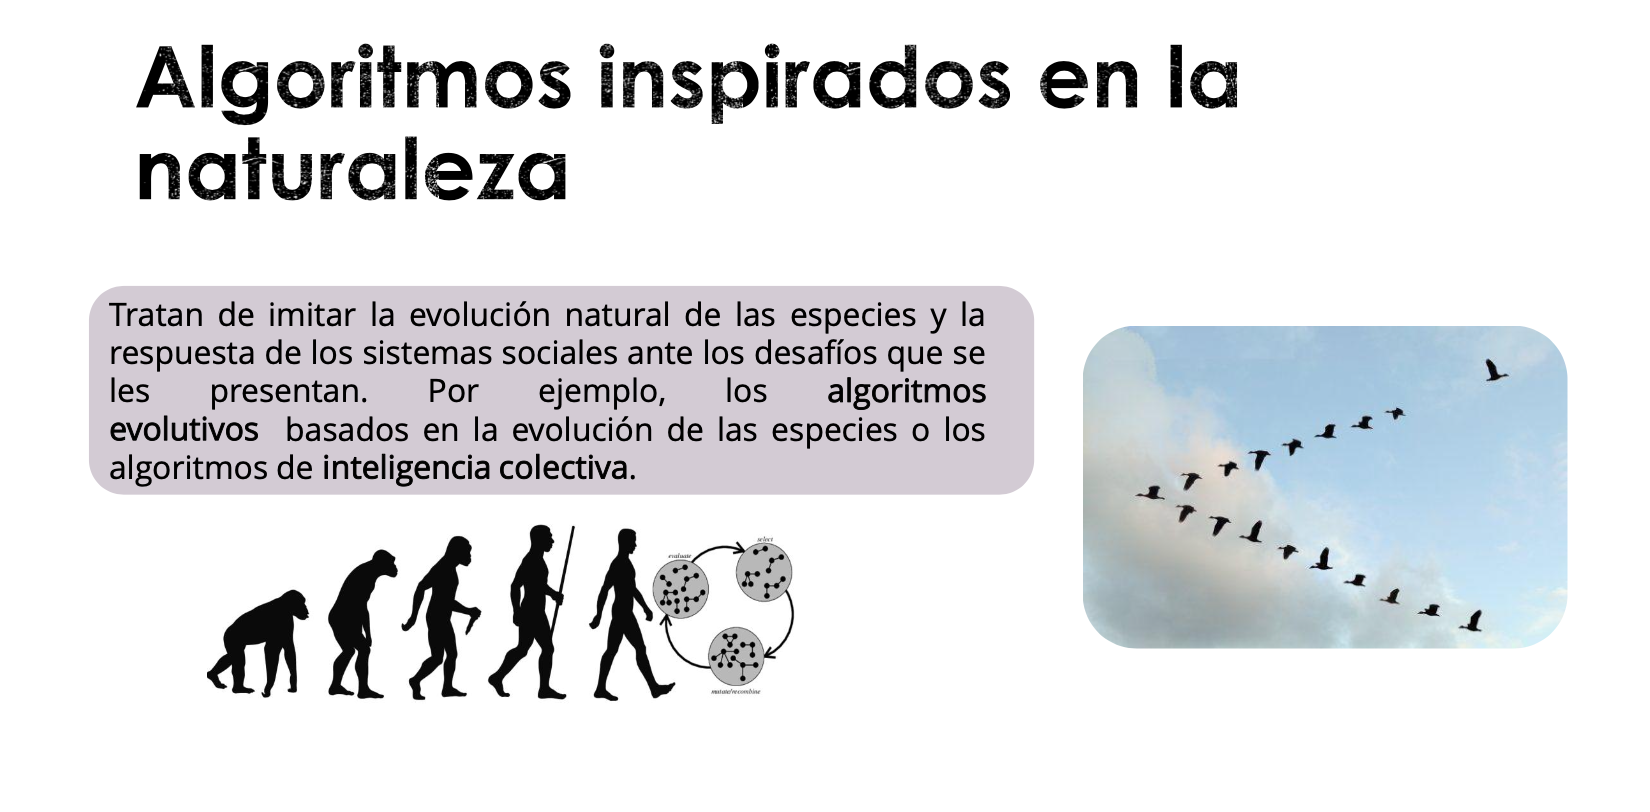



# Algoritmos Genéticos

Los Algoritmos Genéticos son algoritmos de optimización, búsqueda y aprendizaje inspirados en los procesos de Evolución Natural y Evolución Genética.  Algunos términos usados en el desarrollo de estos algoritmos son los siguientes:


*   **Cromosoma**: cadena de genes, que representa a una solución candidata
*   **Población:** conjunto de cromosomas (posibles soluciones)
*   **Gen:** entrada única en el cromosoma, parámetro del conjunto de soluciones
*   **Operadores genéticos:** transforman los cromosomas actuales en nuevos cromosomas (cruzamiento, mutación, …)



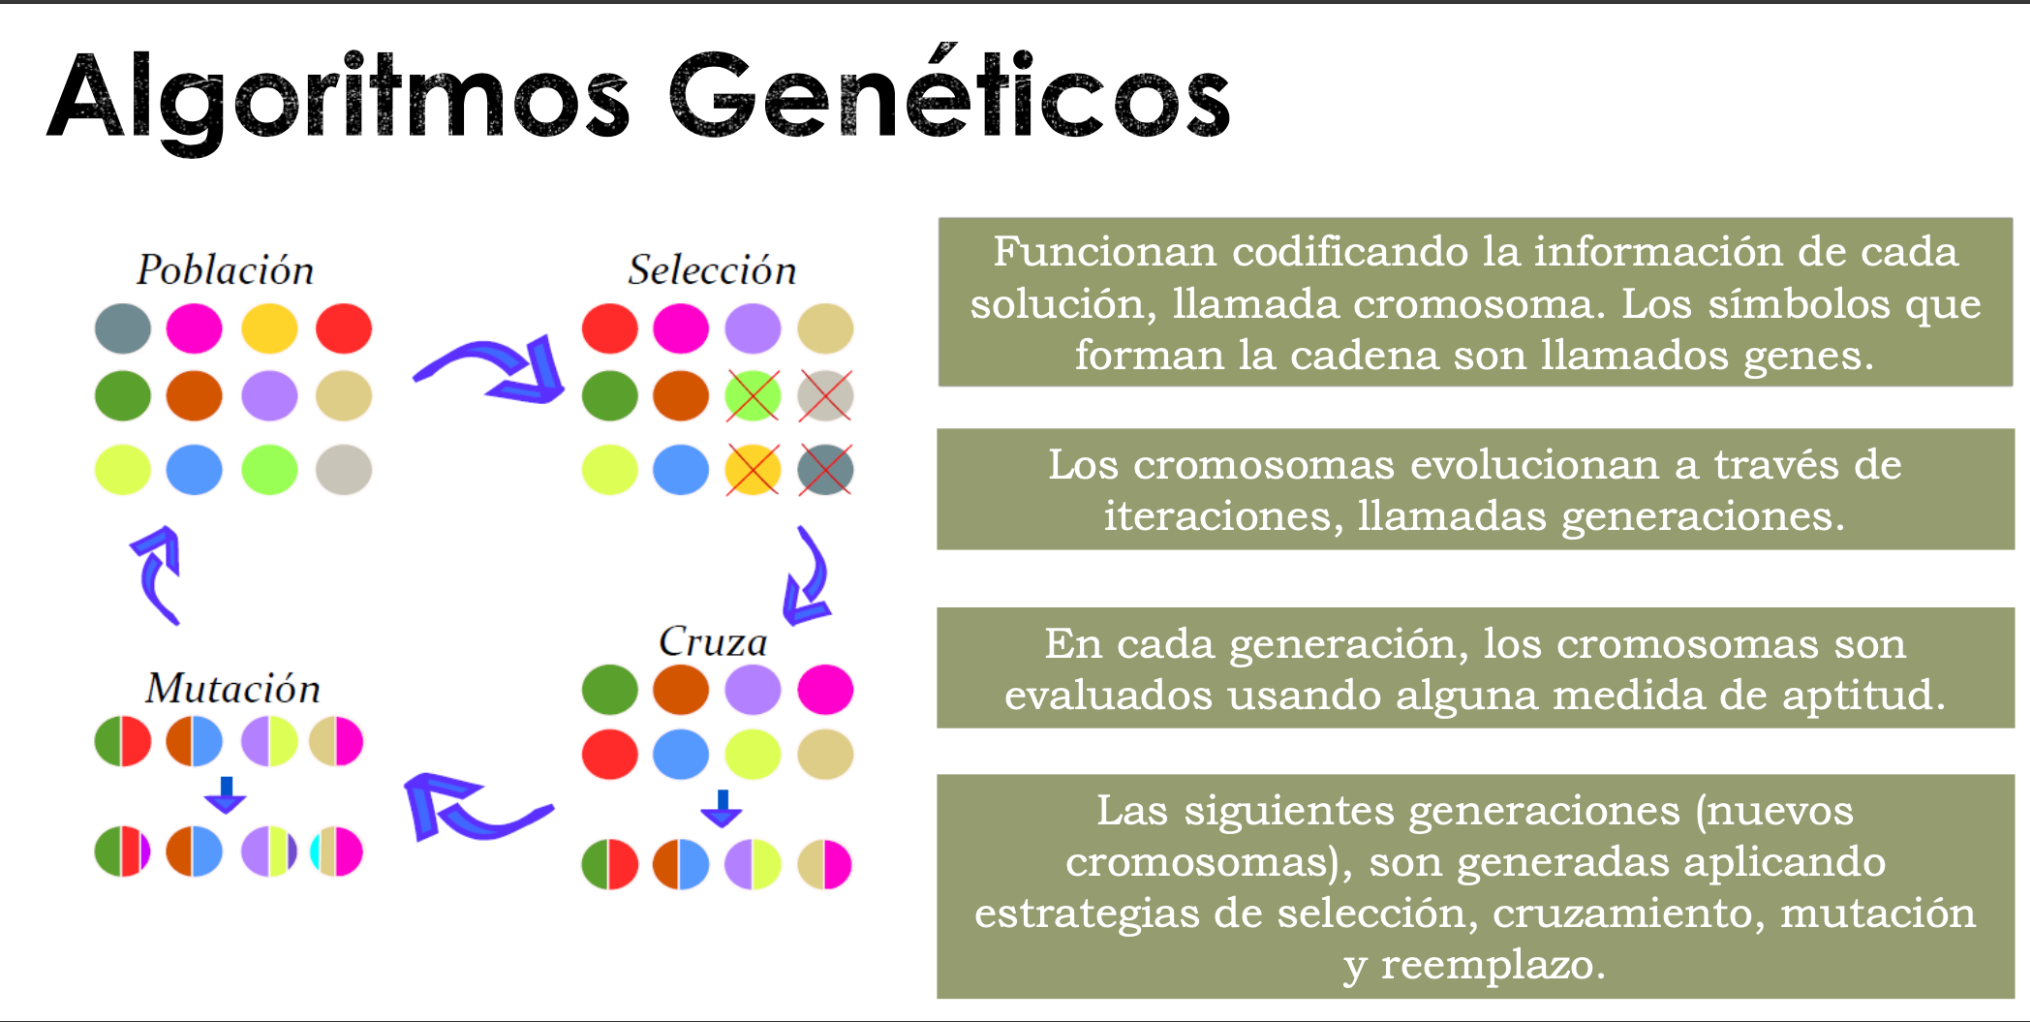

Una parte importante de el diseño y uso de un algoritmo genético tiene que ver con:


*   Elección de representación de soluciones
*   Selección de padres
*   Operador de cruza
*   Operador de mutación
*   Reincersión de lo hijos a la población
*   Configuración de parámetros: tamaño de población, número de generaciones, ¿cuántos padres selecciono?, ¿a quiénes reemplazan los hijos?, ¿cuántas veces repito el proceso?


# PROBLEMA DE LAS 8 REINAS

En 1848  el ajedrecista alemán Max Bezzel propuso el problema de las 8 reinas. Este problema consiste en poner las 8 reinas en un tablero de ajedrez de modo que no se amenacen entre ellas.

En el ajedrez una reina amenaza a aquellas piezas que se encuentren en la misma fila, columna o diagonal debido a que esos son los movimientos que puede realizar.

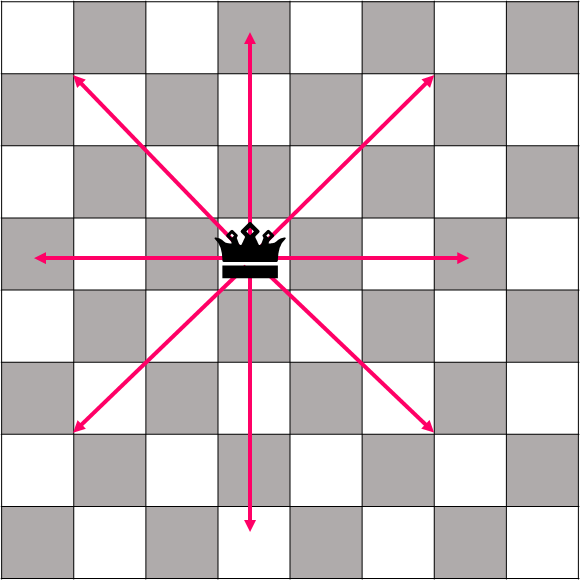

Ahora que conocemos el problema procedemos a resolverlo por medio de un algoritmo genético.

## ¿Cómo podría ser una solución para este problema?

Una manera práctica es representarla como un vector en donde la posición *i* corresponde a que la reina *i* se encuentra en la fila *i* y el valor en dicha posición indica cual es la columna *j*.

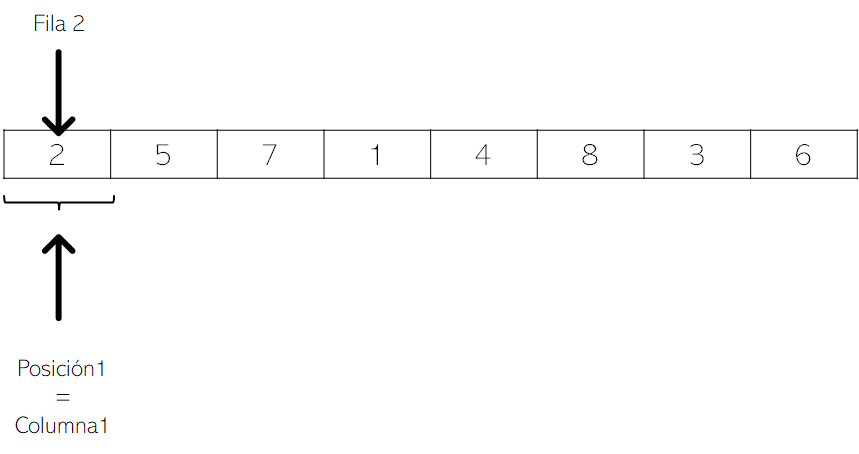

Si quisieramos ver esa solución como una solución en un tablero se podría representar de la siguiente forma:


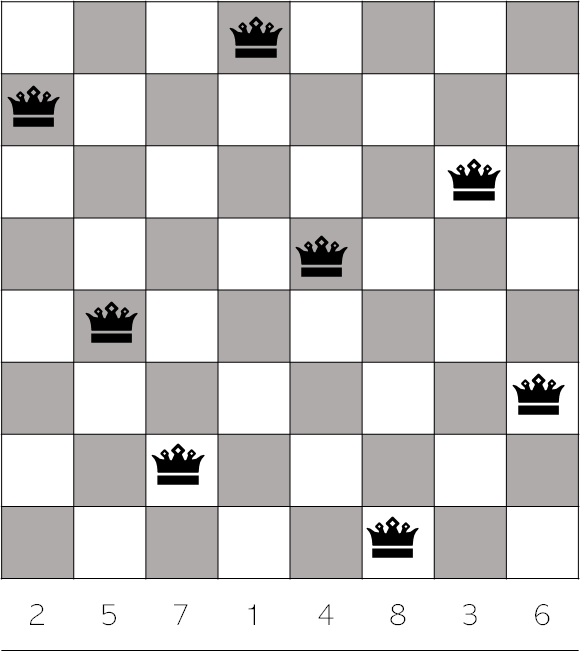

## Comienza nuestro algoritmo.

Primero importamos las bibliotecas que utilizaremos para ciertas operaciones que se harán, las cuales ayudarán a hacer más sencillo el proceso.


In [ ]:
import random
import numpy as np
import copy

Generamos nuestra solución inicial por medio de un vector de una permutación aleatoria de tamaño 8.


In [ ]:
def solucionCandidata():
    return np.random.permutation(8)

In [ ]:
solucion = solucionCandidata()
print(solucion)

[4 7 3 6 1 2 0 5]


La función de aptitud para este problema está definida con respecto a los ataques, es decir, su aptitud será igual al número de ataques de esa solución en particular, cuando el número de ataques sea igual a cero entonces se habrá encontrado una solución óptima.

In [ ]:
def funcionAptitud(sol):
    ataques = 0
    for i in range(len(sol)):
        for j in range(len(sol)):
            if abs(sol[i]-sol[j]) == abs(i-j) and sol[i] != sol[j]:
                ataques += 1
    return ataques

In [ ]:
#Aptitud contiene el número de ataques encontrados en la solución
aptitud = funcionAptitud(solucion)
print(aptitud)

4


Generamos la función que realiza la población inicial. Esta función recibe como entrada el número de individuos que se generarán y devuelve como salida una población en la que ya se ha calculado su valor de aptitud.

In [ ]:
def pob_inicial (num_individuos):
    pob_in = []
    for _ in range(num_individuos):
        solucion = solucionCandidata()
        aptitud = funcionAptitud(solucion)
        pob_in.append({"Solucion": solucion, "Aptitud": aptitud})
    return pob_in


In [ ]:
pob_ejem = pob_inicial(5)
for i in pob_ejem:
    print(i)

{'Solucion': array([0, 3, 2, 6, 1, 4, 5, 7]), 'Aptitud': 12}
{'Solucion': array([4, 7, 0, 6, 3, 1, 5, 2]), 'Aptitud': 4}
{'Solucion': array([4, 3, 6, 7, 1, 0, 2, 5]), 'Aptitud': 12}
{'Solucion': array([5, 6, 2, 7, 0, 3, 4, 1]), 'Aptitud': 10}
{'Solucion': array([5, 0, 6, 1, 4, 2, 3, 7]), 'Aptitud': 6}


Una vez que se tiene a la población total se ordena de menor a mayor con respecto a la aptitud de las soluciones.

In [ ]:
def ordenamiento(poblacion):
    sorted_pob = sorted(poblacion, key=lambda k:k['Aptitud'])

    return sorted_pob

In [ ]:
pob_ordenada = ordenamiento(pob_ejem)
for i in pob_ordenada:
    print(i)

{'Solucion': array([4, 7, 0, 6, 3, 1, 5, 2]), 'Aptitud': 4}
{'Solucion': array([5, 0, 6, 1, 4, 2, 3, 7]), 'Aptitud': 6}
{'Solucion': array([5, 6, 2, 7, 0, 3, 4, 1]), 'Aptitud': 10}
{'Solucion': array([0, 3, 2, 6, 1, 4, 5, 7]), 'Aptitud': 12}
{'Solucion': array([4, 3, 6, 7, 1, 0, 2, 5]), 'Aptitud': 12}


Para la operación de cruza de este problema se utilizará la cruza de un punto, la cual se ilustra en el siguiente ejemplo:
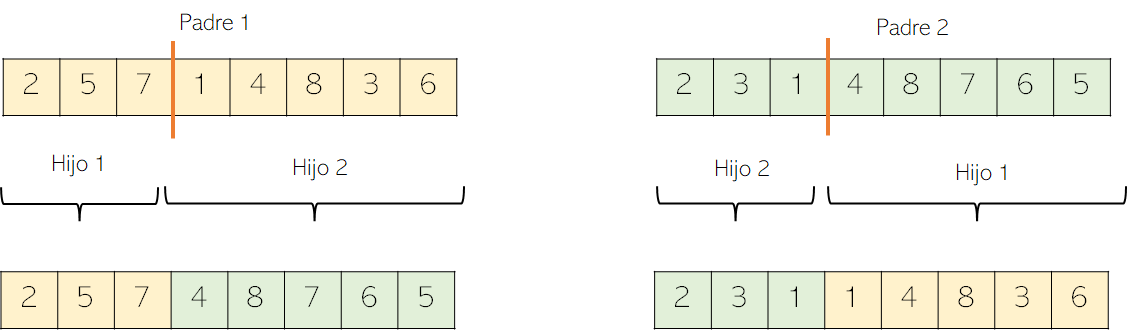

In [ ]:
def cruza (padre1, padre2):
    punto_corte = np.random.randint(1,7)
    hijo1 = copy.deepcopy(padre1["Solucion"])
    hijo2 = copy.deepcopy(padre2["Solucion"])
    hijo1[punto_corte:], hijo2[punto_corte:] = padre2["Solucion"][punto_corte:], padre1["Solucion"][punto_corte:]

    return hijo1, hijo2

In [ ]:
hijo1, hijo2 = cruza(pob_ordenada[0], pob_ordenada[-1])
print(hijo1)
print(hijo2)

[4 7 0 6 3 0 2 5]
[4 3 6 7 1 1 5 2]


Como se observa las soluciones son inconsistentes, por lo que se recurre a repararlas 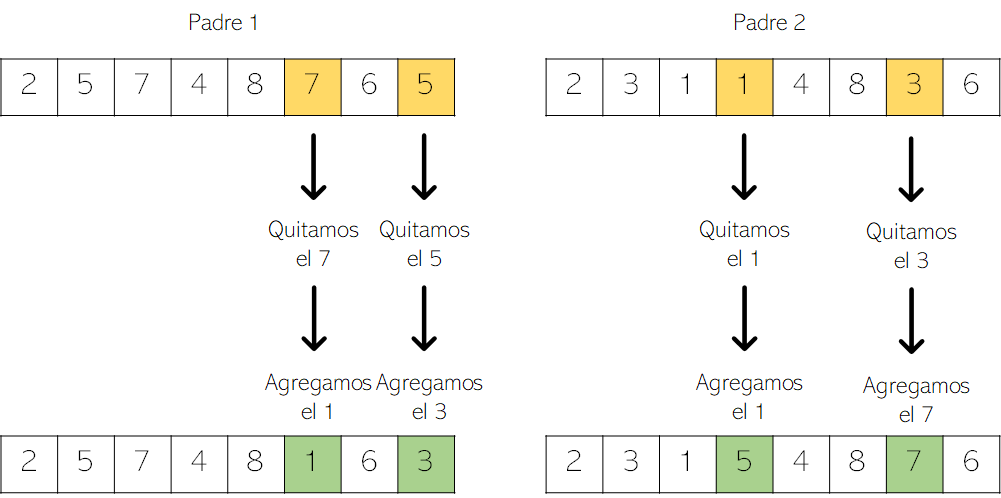

In [ ]:
def reparacion(hijo):
    diccionario = {}

    for i in range(8):
        diccionario[i] = []

    pos = 0
    for i in hijo:
        diccionario[i].append(pos)

        pos += 1

    faltan = []
    sobran = []

    for val in diccionario:
        if len(diccionario[val]) > 1:
            sobran.append(val)
        elif len(diccionario[val]) < 1:
            faltan.append(val)

    for s, f in zip(sobran, faltan):
        sobra = diccionario[s][-1]
        diccionario[s].pop()
        diccionario[f].append(sobra)
        hijo[sobra] = f

    return hijo

In [ ]:
hijo1_aux = copy.deepcopy(hijo1)
hijo2_aux = copy.deepcopy(hijo2)
reparacion_hijo1 = reparacion(hijo1_aux)
reparacion_hijo2 = reparacion(hijo2_aux)
print("Hijo 1:", hijo1, "Hijo 1 reparado:", reparacion_hijo1)
print("Hijo 2:", hijo2, "Hijo 2 reparado:", reparacion_hijo2)

Hijo 1: [4 7 0 6 3 0 2 5] Hijo 1 reparado: [4 7 0 6 3 1 2 5]
Hijo 2: [4 3 6 7 1 1 5 2] Hijo 2 reparado: [4 3 6 7 1 0 5 2]


Después de que se tienen a los hijos reparados estos son mutados con cierta probabilidad 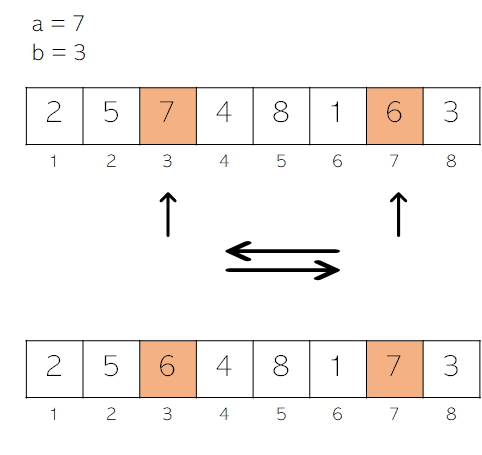

In [ ]:
def muta(hijo):
    a,b = np.random.randint(0,8,2)
    hijo[a],hijo[b] = hijo[b],hijo[a]
    return hijo

In [ ]:
hijo1_mutado = muta(copy.deepcopy(reparacion_hijo1))
print("Hijo 1:", reparacion_hijo1, "Hijo 1 mutado: ", hijo1_mutado)

Hijo 1: [4 7 0 6 3 1 2 5] Hijo 1 mutado:  [4 7 0 6 3 1 2 5]


En el programa principal se llaman a las funciones para realizar el proceso evolutivo.

In [ ]:
pip install iteration_utilities

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
from iteration_utilities import duplicates
def main():
    random.seed(1)
    np.random.seed(5)
    N = 100
    poblacion = pob_inicial(N)
    mejor_cada_gen=[]
    max_evals = 10000
    num_evals = N
    gen = 1
    pob_ordenada = ordenamiento(poblacion)
    mejor_cada_gen.append(pob_ordenada[0])
    while num_evals < max_evals :
        if pob_ordenada[0]["Aptitud"] ==0 :
            break;
        candidatos_padres = random.sample(pob_ordenada, 5)
        padres = ordenamiento(candidatos_padres)[:2]
        hijo1,hijo2 = cruza(padres[0],padres[1])
        hijo_1 = reparacion(hijo1)
        hijo_2 = reparacion(hijo2)
        umbral = 0.8
        if np.random.uniform() < umbral:
            hijo_1 = muta(hijo_1)
        if np.random.uniform() < umbral:
            hijo_2 = muta(hijo_2)
        hijos_aptitud =  []
        aptitud1 = funcionAptitud(hijo_1)
        hijos_aptitud.append({"Solucion": hijo_1, "Aptitud" : aptitud1})
        num_evals +=1
        aptitud2 = funcionAptitud(hijo_2)
        hijos_aptitud.append({"Solucion": hijo_2, "Aptitud" : aptitud2})
        num_evals +=1
        poblacion_1= ordenamiento(pob_ordenada + hijos_aptitud)
        pob_ordenada = poblacion_1[:N]
        mejor_cada_gen.append(pob_ordenada[0])
        arr = np.array(mejor_cada_gen[-1]["Solucion"])
        mat = np.zeros((8, 8))

        for column, val in zip(range(mat.shape[1]), arr):
            mat[val][column] = 1
        print( "Generación: ", gen, "Evaluaciones: ", num_evals, "Mejor solución actual: ", mejor_cada_gen[-1])
        print(mat)
        gen += 1

    for ind in pob_ordenada:
      dup = list(duplicates(ind["Solucion"]))
      if len(dup)>0:
        print("si hay")
    return mejor_cada_gen

if __name__ == "__main__":
    mejores = main()

Generación:  1 Evaluaciones:  102 Mejor solución actual:  {'Solucion': array([5, 2, 0, 3, 6, 4, 1, 7]), 'Aptitud': 2}
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Generación:  2 Evaluaciones:  104 Mejor solución actual:  {'Solucion': array([5, 2, 0, 3, 6, 4, 1, 7]), 'Aptitud': 2}
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Generación:  3 Evaluaciones:  106 Mejor solución actual:  {'Solucion': array([5, 2, 0, 3, 6, 4, 1, 7]), 'Aptitud': 2}
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 